In [1]:
'''Here I will write a set of functions that takes in an SOM weightcube,
together with a reference images and assignes lanels to each neuron in 
the wieght cube, therefore when we input a weightcube and a image it
outputs the weightcube and a set of labels'''

'Here I will write a set of functions that takes in an SOM weightcube,\ntogether with a reference images and assignes lanels to each neuron in \nthe wieght cube, therefore when we input a weightcube and a image it\noutputs the weightcube and a set of labels'

Might actually be easier to take in an image and make it into a 2D array with numbers for classes

In [2]:
from PIL import Image
img = Image.open('/home/luissanchez25/Trail_imgs_to_classification/im_kr83cal_decile.0.rmpsom.png')

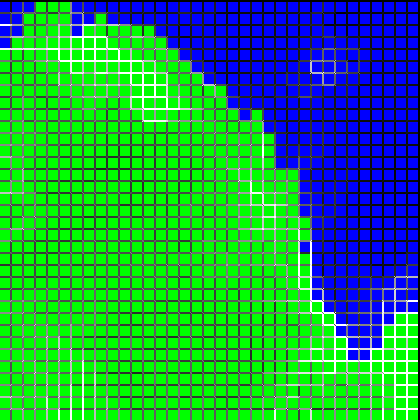

In [3]:
img.show()

In [4]:
import numpy as np
np.shape(img)

(420, 420, 3)

In [30]:
Img_as_array = np.asarray(img) #extracts infromation in the image as an array

In [202]:
def Convert_img_to_labels(img, num_of_cells_hor, num_of_cells_ver):
    '''Input image from an SOM overlain with class labels, gives a number to 
    each color and returns a 2D array with the numbers corresponding to a 
    particular class, this is generec so not limited by numbers of labels,
    notw this assumes a square SOM'''
    Img_as_array = np.asarray(img) #convert image to array
    [x_dim_img, y_dim_img, color_dim] = np.shape(img) #extracts dimensions of the image
    assert color_dim == 3:
        print('ERROR, input image is not an RGB image')
    
    #select coordinates
    step_size = x_dim_img / num_of_cells_hor
    label_x_coordinate = (np.arange(num_of_cells_hor)+1)*step_size-(step_size/2)
    label_y_coordinate = label_x_coordinate #this assumes a square image
    [mesh_x, mesh_y] = np.meshgrid(label_y_coordinate,label_x_coordinate)
    positions = np.vstack([mesh_x.ravel(), mesh_y.ravel()])
    
    #need to record all available colors to make sure every unique color has a label
    record_colors = Img_as_array[positions[1,:].astype(int),positions[0,:].astype(int),:]
    unique_labels = np.unique(record_colors, axis = 0)
    assert ()
    set_labels = np.arange(len(unique_labels)) + 1
    record_colors_2d = np.reshape(record_colors, 
                                  [num_of_cells_hor, num_of_cells_ver, color_dim])
    
    #make 2d grid with labels
    #try coding this part later without loops or maybe even if statements
    number_of_cells = np.arange(num_of_cells_hor*num_of_cells_ver)
    number_of_labels = np.arange(len(unique_labels))
    SOM_label_array = np.zeros((num_of_cells_hor*num_of_cells_ver))
    for cell_num in number_of_cells:
        for label in number_of_labels:
            if all(unique_labels[label] == record_colors[cell_num]):
                SOM_label_array[cell_num] = set_labels[label]
                
    SOM_labels = np.reshape(SOM_label_array, [35,35])
    return SOM_labels, record_colors_2d
        

In [203]:
[d1array, d2array] = Convert_img_to_labels(img,35,35)

In [204]:
d1array

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 2., ..., 1., 1., 1.],
       [1., 1., 2., ..., 1., 1., 1.],
       ...,
       [2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.],
       [2., 2., 2., ..., 2., 2., 2.]])

In [211]:
from scipy.io import loadmat #imports data in a .mat file
load_SOM_wcube = loadmat('s2_top_synth_1000e_missPMTs_12x12_1Msteps_wgtcub_export.mat')

In [212]:
SOM_weight_cube = load_SOM_wcube['data_cube']

In [253]:
def SOM_label_data(data, SOM_weight_cube, SOM_classification_img):
    [x_dim_wcube, y_dim_wcube, data_dim] = np.shape(SOM_weight_cube)
    SOM_labels = np.zeros(len(data))
    for data_vec_num in np.arange(len(data)):
        winner_location = compute_winning_neuron(data[data_vec_num], SOM_weight_cube)
        SOM_label[data_vec_num] = SOM_classification_img[winner_location[0,0],winner_location[0,1]]
    

In [228]:
def compute_winning_neuron(data, SOM_weight_cube):
    data_vs_wcube_diff = SOM_weight_cube - data
    compute_euclidean_distance = np.sqrt(np.sum(np.square(data_vs_wcube_diff),axis = 2))
    winner_location = mp.argwhere(compute_euclidean_distance == np.min(compute_euclidean_distance))
    return winner_location